In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [5]:
def execute(X_train, X_test, Y_train, Y_test):

  accuracy = []
 
  lda = LinearDiscriminantAnalysis()
  lda.fit(X_train, Y_train)
  Y_pred = lda.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  # print(accuracy_score(Y_test, Y_pred))

  lp = Perceptron()
  lp.fit(X_train, Y_train)
  Y_pred = lp.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  # print(accuracy_score(Y_test, Y_pred))

  nb = GaussianNB()
  nb.fit(X_train, Y_train)
  Y_pred = nb.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  # print(accuracy_score(Y_test, Y_pred))

  lr = LogisticRegression(solver = 'sag',max_iter = 200)
  lr.fit(X_train, Y_train)
  Y_pred = lr.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  # print(accuracy_score(Y_test, Y_pred))

  ann = MLPClassifier(hidden_layer_sizes=(10), max_iter=200)
  ann.fit(X_train, Y_train)
  Y_pred = ann.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  # print(accuracy_score(Y_test, Y_pred))

  SVM = SVC()
  SVM.fit(X_train, Y_train)
  Y_pred = SVM.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  # print(accuracy_score(Y_test, Y_pred))

  return accuracy
  

In [6]:
df = pd.read_csv("dataset_comb.csv")
Y = df["Class"].to_numpy()
X = df.drop(columns = ["Class"]).to_numpy()
kf = KFold(n_splits=7, random_state=None, shuffle=True)
accuracy = []
for train_index, test_index in kf.split(df):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  accuracy.append(execute(X_train, X_test, Y_train, Y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

Text(0, 0.5, 'Accuracy')

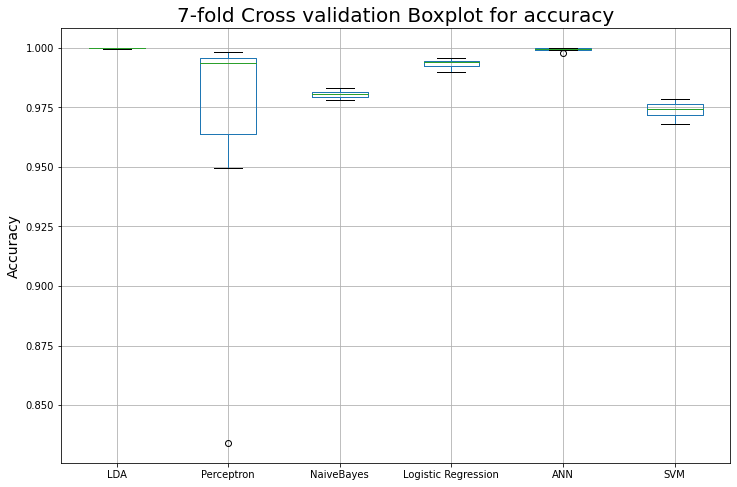

In [7]:
accuracy_df = pd.DataFrame(np.array(accuracy),columns=['LDA', 'Perceptron', 'NaiveBayes','Logistic Regression','ANN','SVM'])
fig, ax = plt.subplots(figsize=(12, 8))
ax = accuracy_df.boxplot()
ax.set_title('7-fold Cross validation Boxplot for accuracy', fontsize=20)
ax.set_ylabel("Accuracy", fontsize=14)

Text(0.5, 0, 'Fold Count')

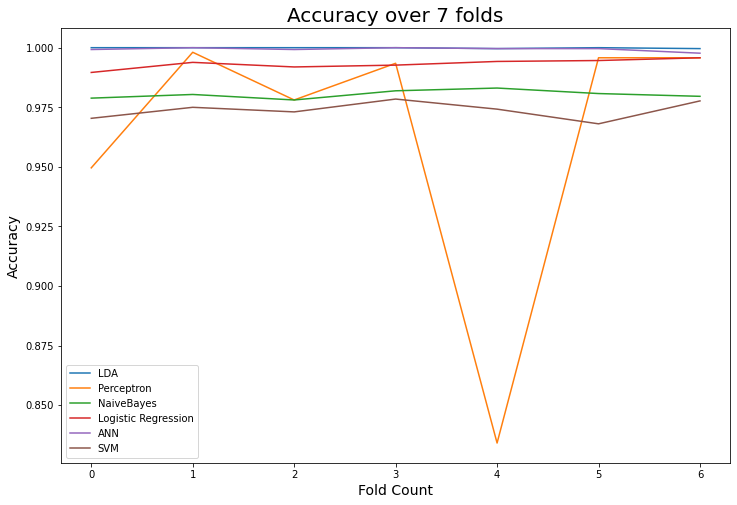

In [8]:
bbplot = accuracy_df.plot(figsize=(12, 8))
bbplot.set_title('Accuracy over 7 folds', fontsize=20)
bbplot.set_ylabel("Accuracy", fontsize=14)
bbplot.set_xlabel("Fold Count", fontsize=14)